Import Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the CSV file

In [77]:
df  = pd.read_csv("C:/Users/hp/Documents/python codes/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [78]:
df.shape

(51717, 17)

In [79]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [80]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis = 1, errors='ignore')      #dropping unwanted columns
df.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [81]:
df.drop_duplicates(inplace = True)    #removing duplicates
df.shape

(51609, 11)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51609 non-null  object
 1   online_order                 51609 non-null  object
 2   book_table                   51609 non-null  object
 3   rate                         43854 non-null  object
 4   votes                        51609 non-null  int64 
 5   location                     51588 non-null  object
 6   rest_type                    51382 non-null  object
 7   cuisines                     51564 non-null  object
 8   approx_cost(for two people)  51265 non-null  object
 9   listed_in(type)              51609 non-null  object
 10  listed_in(city)              51609 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.7+ MB


Cleaning Rate Column

In [83]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [84]:
def remove(value):
    if(value == 'NEW' or value == '-'):    #replace the 'NEW' or '-' values with null values
        return np.nan
    else:
        
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df['rate'] = df['rate'].apply(remove)



In [85]:
df['rate'].isnull().sum()

10019

In [86]:
df['rate'] = df['rate'].fillna(df['rate'].mean())

df['rate'].isnull().sum()


0

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [88]:
df.dropna(inplace= True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51042 non-null  object 
 1   online_order                 51042 non-null  object 
 2   book_table                   51042 non-null  object 
 3   rate                         51042 non-null  float64
 4   votes                        51042 non-null  int64  
 5   location                     51042 non-null  object 
 6   rest_type                    51042 non-null  object 
 7   cuisines                     51042 non-null  object 
 8   approx_cost(for two people)  51042 non-null  object 
 9   listed_in(type)              51042 non-null  object 
 10  listed_in(city)              51042 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


Renaming Columns

In [90]:
df.rename(columns={'approx_cost(for two people)': 'Cost2plates', 'listed_in(type)' : 'Type'}, inplace= True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [91]:
df = df.drop(['listed_in(city)'], axis = 1)  #dropping listed_in(city) column


Cleaning the Cost2Plates column

In [92]:
df['Cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [93]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
    
    return float(value)

df['Cost2plates'] = df['Cost2plates'].apply(handlecomma)

df['Cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

Cleaning the Rest_Type column

In [94]:
rest_type = df['rest_type'].value_counts(ascending = False)
rest_type

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [95]:
lessthan_1000 = rest_type[rest_type < 1000]  

lessthan_1000

rest_type
Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 85, dtype: int64

In [96]:
def clusterless_1000(value):
    if (value in lessthan_1000):
        return 'others'                 #rest_type for those who have count less than 1000 is renamed as others
    else:
        return value
    
df['rest_type'] = df['rest_type'].apply(clusterless_1000)

df['rest_type'].value_counts(ascending=False)
    

rest_type
Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

Cleaning the Location column

In [97]:
location_count = df['location'].value_counts(ascending=False)

location_300 =  location_count[location_count < 300]

def handle_location_300(value):
    if value in location_300:
        return 'others'                 #renaming locations whose count is less than 300 as others
    else:
        return value

df['location'] =  df['location'].apply(handle_location_300)

df['location'].value_counts(ascending=False)

location
BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

Cleaning the Cuisine column

In [98]:
cuisine_count = df['cuisines'].value_counts(ascending=False)

cuisine_count_100 = cuisine_count[cuisine_count  < 100]

def handle_cuisine_count_100(value):
    if value in cuisine_count_100:
        return 'others'       
    else:
        return value
    
df['cuisines'] = df['cuisines'].apply(handle_cuisine_count_100)


In [99]:
df['cuisines'].value_counts()

cuisines
others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

Data Visualizations

Countplot for Various Locations


Text(0.5, 1.0, 'Location Vs Count')

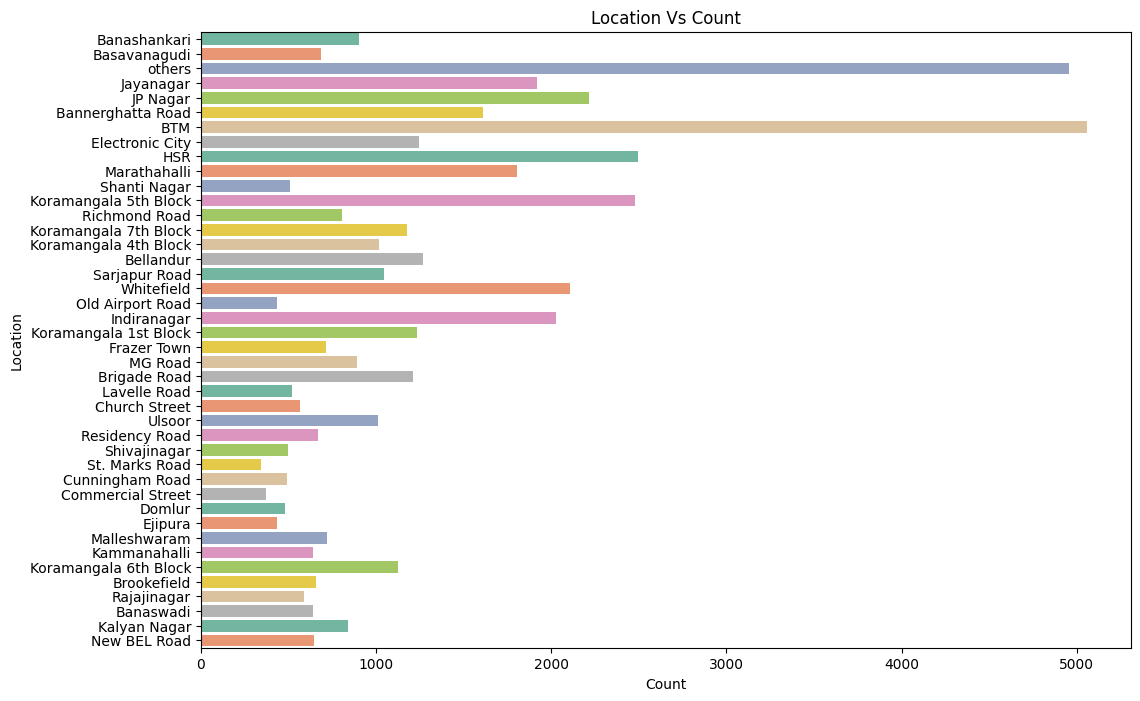

In [100]:
plt.figure(figsize = (12,8))

sns.countplot(data = df, y = 'location',hue = 'location', palette='Set2')

plt.xlabel("Count")
plt.ylabel("Location")
plt.title("Location Vs Count")


Online Order Visualization

Text(0.5, 1.0, 'Count Vs Online Order Availability')

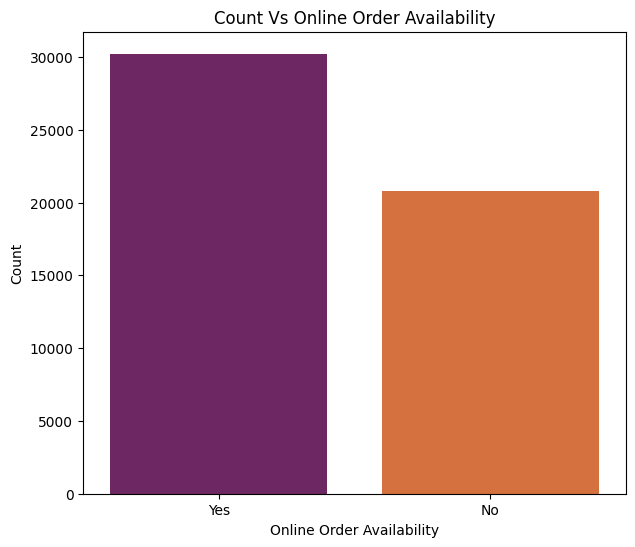

In [101]:
plt.figure(figsize = (7,6))

sns.countplot(x = 'online_order', hue = 'online_order', data = df, palette= 'inferno')
plt.xlabel("Online Order Availability")
plt.ylabel("Count")
plt.title("Count Vs Online Order Availability")


Online Order Vs Rate Visualization

C:\Users\hp\AppData\Local\Temp\ipykernel_14500\3878156395.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'online_order', y = 'rate', data = df, palette = 'inferno')


Text(0.5, 1.0, 'Rating Vs Online Order Availability')

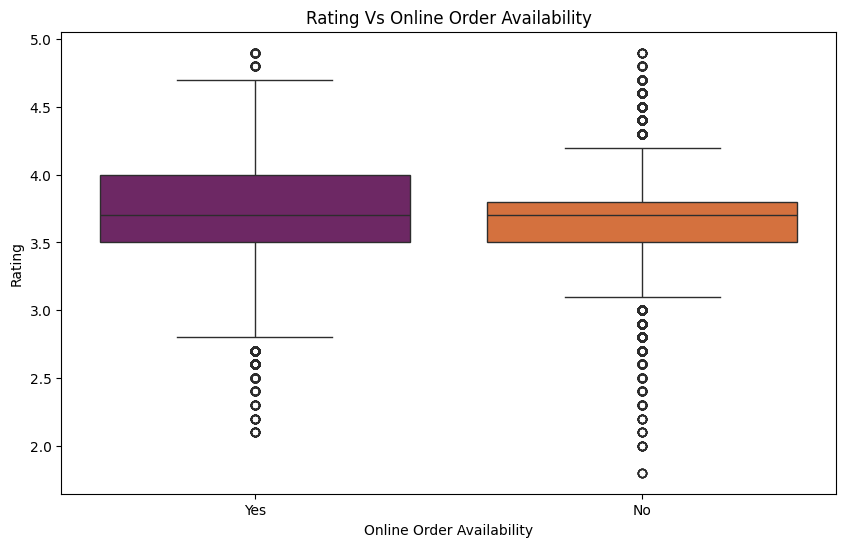

In [102]:
plt.figure(figsize = (10,6))

sns.boxplot(x = 'online_order', y = 'rate', data = df, palette = 'inferno')

plt.xlabel("Online Order Availability")
plt.ylabel("Rating")
plt.title("Rating Vs Online Order Availability")

Booktable Vs Rate Visualization

C:\Users\hp\AppData\Local\Temp\ipykernel_14500\2569859246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'book_table', y = 'rate', palette= 'inferno', data = df)


Text(0.5, 1.0, 'Rating Vs Book Table Availability')

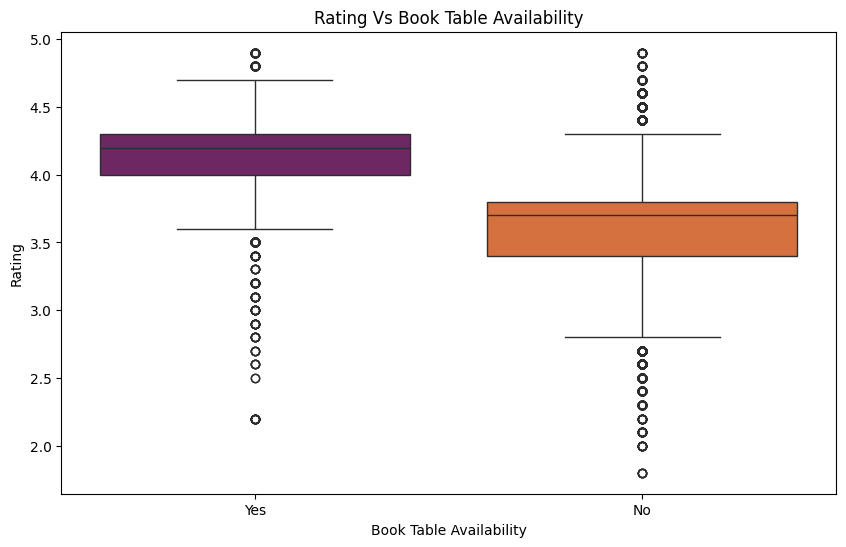

In [103]:
plt.figure(figsize = (10,6))

sns.boxplot(x = 'book_table', y = 'rate', palette= 'inferno', data = df)
plt.xlabel("Book Table Availability")
plt.ylabel("Rating")
plt.title("Rating Vs Book Table Availability")

Visualizing Online Order Facility by Location 

In [104]:
df['Type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [105]:
df['rest_type'].unique()

array(['Casual Dining', 'others', 'Quick Bites', 'Cafe', 'Delivery',
       'Dessert Parlor', 'Bakery', 'Takeaway, Delivery',
       'Casual Dining, Bar'], dtype=object)

In [106]:
df1 = df.groupby(['location', 'online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')


In [107]:
df1 = pd.pivot_table(values = 'name', index = 'location', columns = 'online_order', aggfunc=np.sum, data =df1)   #creating a pivot table for a clear understanding of the data and for data visualization
df1

C:\Users\hp\AppData\Local\Temp\ipykernel_14500\1437074869.py:1: FutureWarning: The provided callable <function sum at 0x0000022363FC2700> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1 = pd.pivot_table(values = 'name', index = 'location', columns = 'online_order', aggfunc=np.sum, data =df1)   #creating a pivot table for a clear understanding of the data and for data visualization


online_order,No,Yes
location,,
BTM,1763,3293
Banashankari,397,505
Banaswadi,302,338
Bannerghatta Road,685,924
Basavanagudi,243,441
Bellandur,517,751
Brigade Road,552,658
Brookefield,239,417
Church Street,226,340


Text(0.5, 1.0, 'Count of Online Order Facility Vs Location')

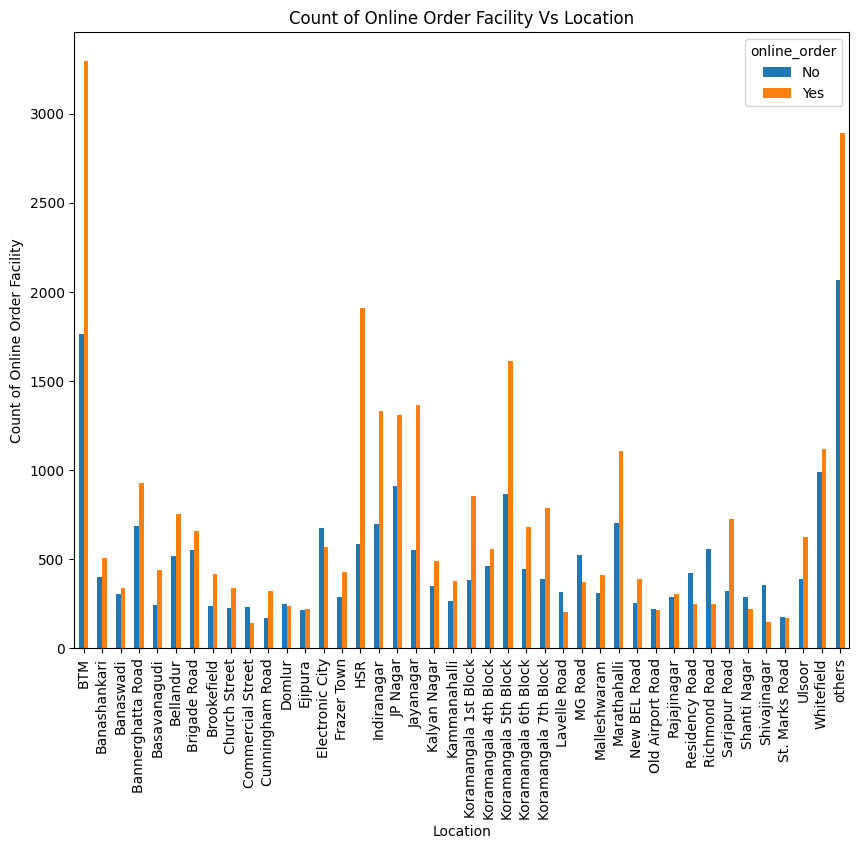

In [108]:
df1.plot(kind = "bar", figsize = (10,8))
plt.xlabel("Location")
plt.ylabel("Count of Online Order Facility")
plt.title("Count of Online Order Facility Vs Location")

Visualizing Book Table Facilities by Location

In [109]:
df2 = df.groupby(['location', 'book_table'])['name'].count()
df2.to_csv("location_booktable.csv")

df2 = pd.read_csv('location_booktable.csv')

df2 = df2.pivot_table(values = 'name', columns = 'book_table', index = 'location', aggfunc=np.sum)
df2

C:\Users\hp\AppData\Local\Temp\ipykernel_14500\2778862867.py:6: FutureWarning: The provided callable <function sum at 0x0000022363FC2700> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2 = df2.pivot_table(values = 'name', columns = 'book_table', index = 'location', aggfunc=np.sum)


book_table,No,Yes
location,,
BTM,4889.0,167.0
Banashankari,839.0,63.0
Banaswadi,632.0,8.0
Bannerghatta Road,1510.0,99.0
Basavanagudi,668.0,16.0
Bellandur,1170.0,98.0
Brigade Road,1034.0,176.0
Brookefield,582.0,74.0
Church Street,385.0,181.0


Text(0.5, 1.0, 'Book Table Facility Vs Location')

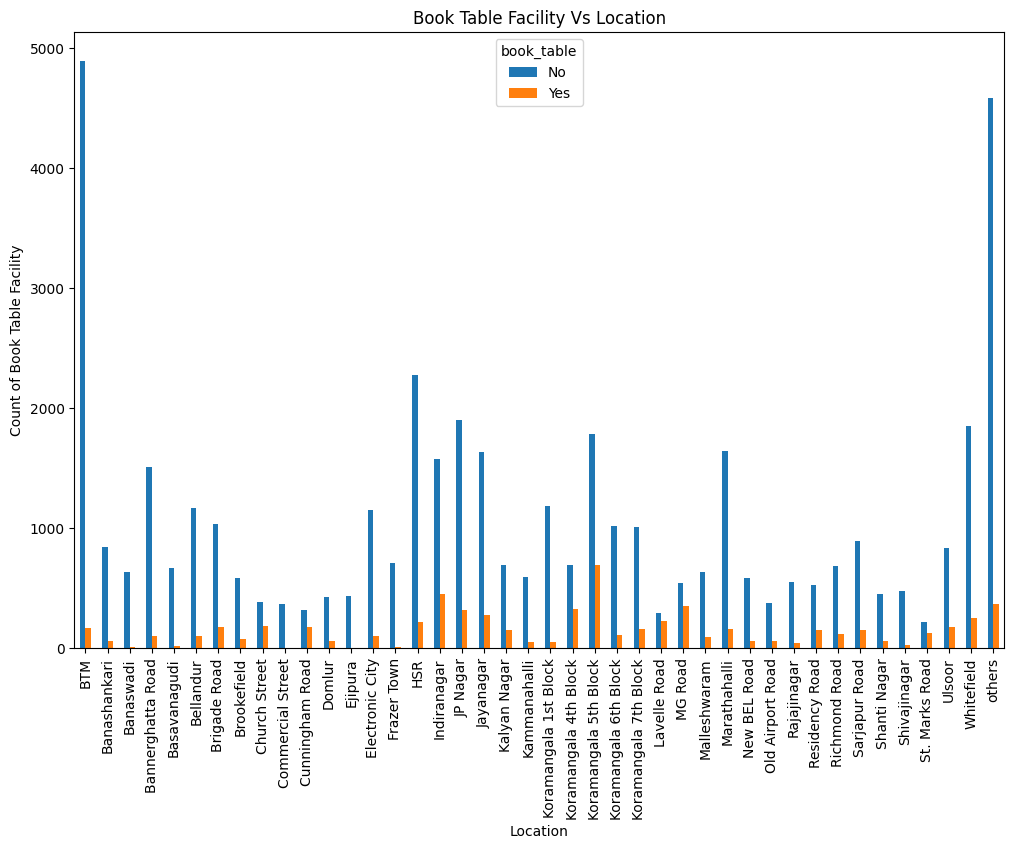

In [110]:
df2.plot(kind = 'bar', figsize=(12,8))
plt.xlabel("Location")
plt.ylabel("Count of Book Table Facility")
plt.title("Book Table Facility Vs Location")

Restaurants Vs Rate Column Visualization

Text(0.5, 1.0, 'Rating Vs Restaurant Type')

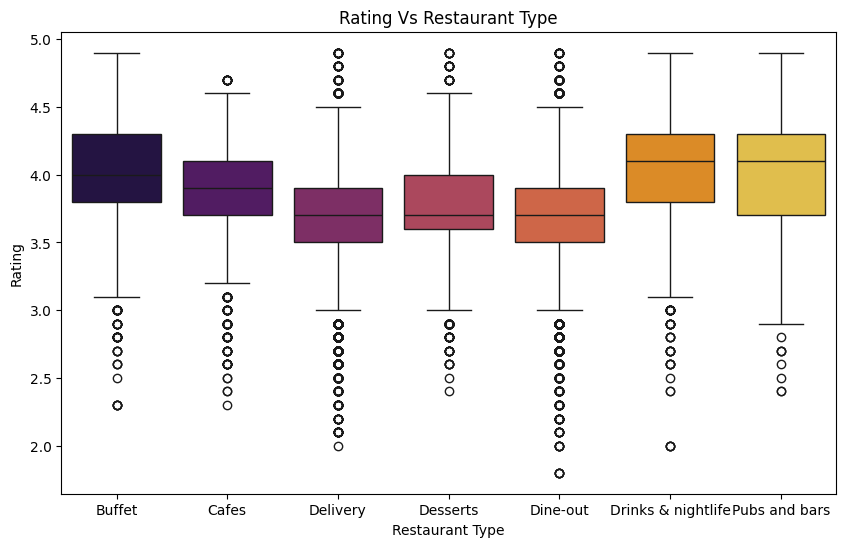

In [111]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x = 'Type', y = 'rate', hue = 'Type', palette='inferno')
plt.xlabel("Restaurant Type")
plt.ylabel("Rating")
plt.title("Rating Vs Restaurant Type")

Visualizing types of Restaurants by Location 

In [112]:
df3 = df.groupby(['location', 'Type'])['name'].count()
df3.to_csv("location_type.csv")
df3 = pd.read_csv('location_type.csv')
df3.head()


,location,Type,name
0,BTM,Buffet,21
1,BTM,Cafes,83
2,BTM,Delivery,3053
3,BTM,Desserts,198
4,BTM,Dine-out,1660


In [113]:
df3 = df3.pivot_table(index='location', columns='Type', fill_value= 0 , aggfunc=np.sum, values = 'name')
df3

C:\Users\hp\AppData\Local\Temp\ipykernel_14500\2765556434.py:1: FutureWarning: The provided callable <function sum at 0x0000022363FC2700> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 = df3.pivot_table(index='location', columns='Type', fill_value= 0 , aggfunc=np.sum, values = 'name')


Type,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
location,,,,,,,
BTM,21,83,3053,198,1660,22,19
Banashankari,7,36,418,71,356,14,0
Banaswadi,0,24,310,37,262,6,1
Bannerghatta Road,9,46,828,137,578,9,2
Basavanagudi,7,11,344,66,251,5,0
Bellandur,28,36,617,75,479,17,16
Brigade Road,25,46,497,108,455,57,22
Brookefield,6,17,339,45,245,4,0
Church Street,19,51,193,29,215,36,23


Text(0.5, 1.0, 'Count of Restaurant Types Vs Location')

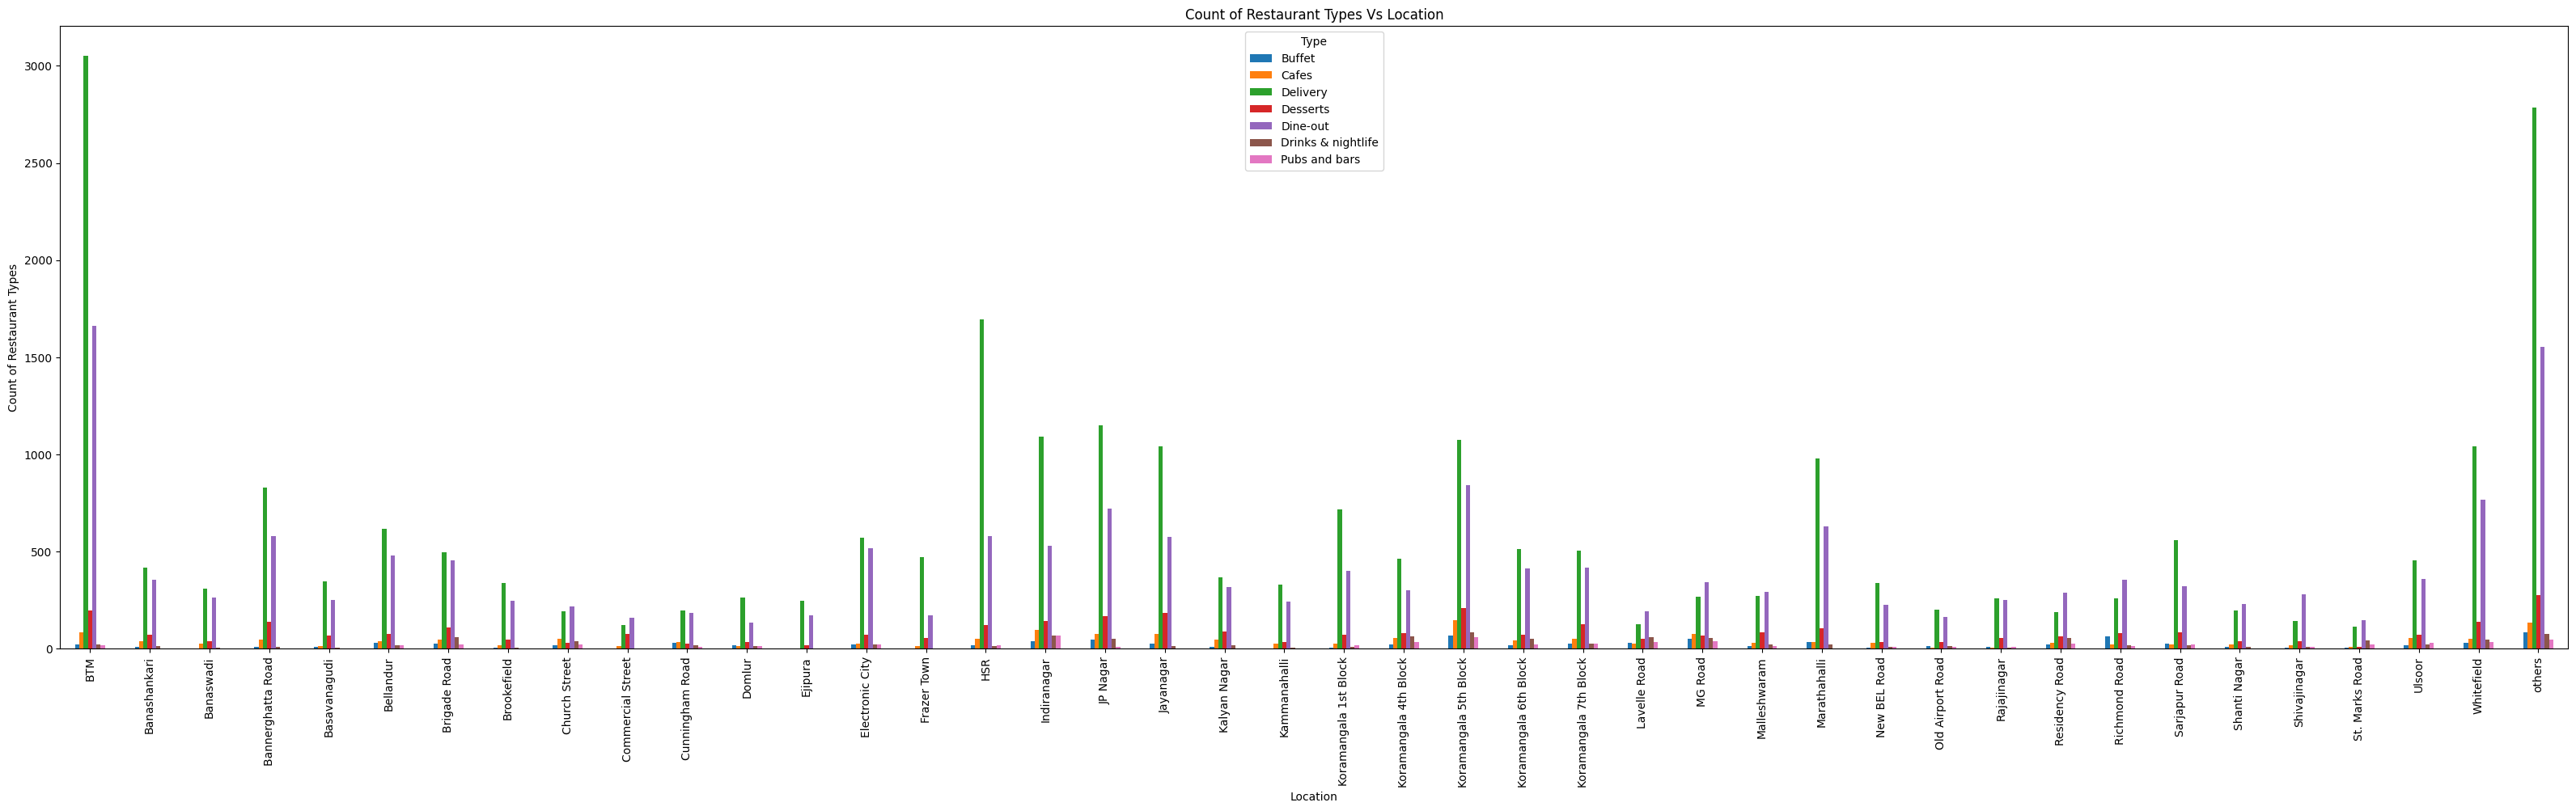

In [114]:
df3.plot(kind = 'bar', figsize = (40,10))
plt.xlabel("Location")
plt.ylabel("Count of Restaurant Types")
plt.title("Count of Restaurant Types Vs Location")


Visualizing No. of Votes by Location

In [115]:
df4 = df[['location', 'votes']]
df4.drop_duplicates()

df4 = df4.groupby(['location'])['votes'].sum()
df4 = df4.to_frame()

df4 = df4.sort_values('votes', ascending=False)

df4.head()

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'others'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Lavelle Road'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Brigade Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text

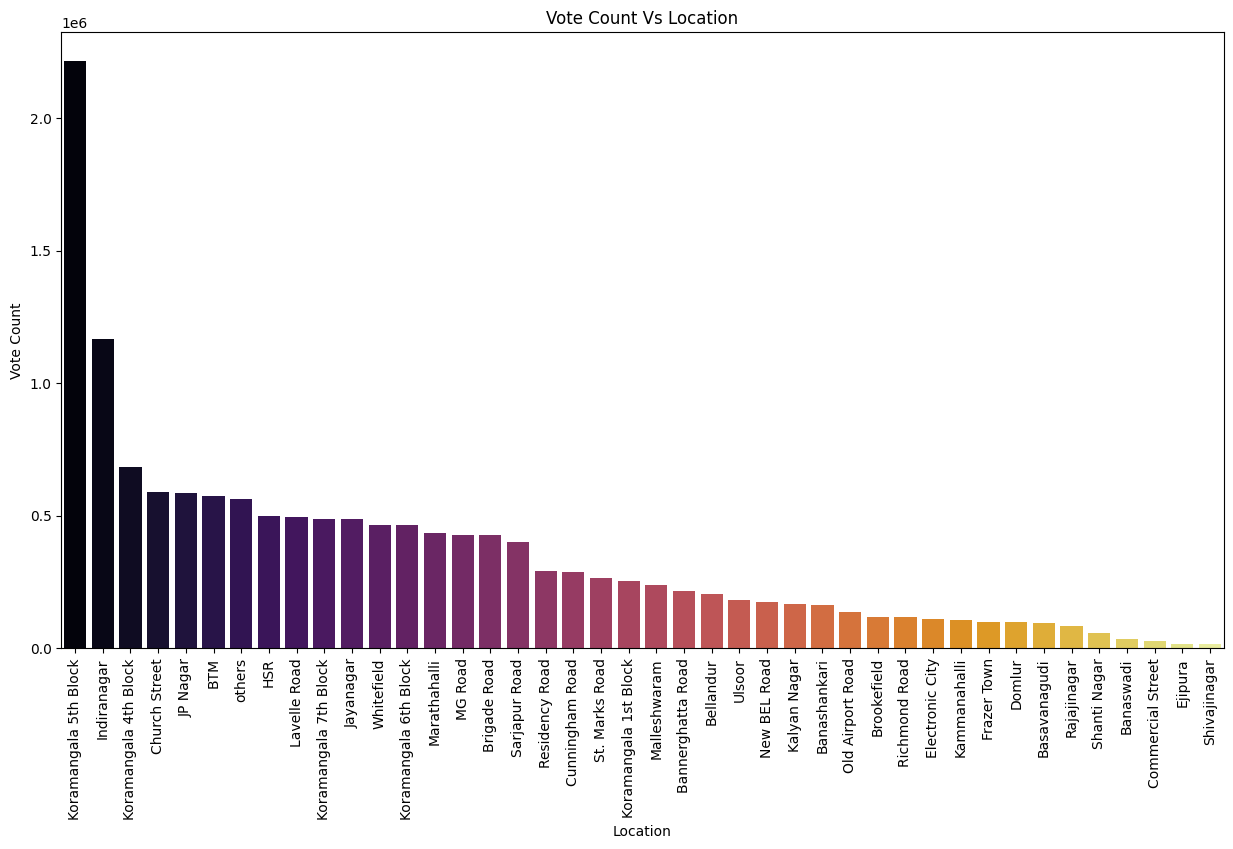

In [116]:
plt.figure(figsize=(15,8))

sns.barplot(df4, x = 'location', y = 'votes', hue = 'location', palette='inferno')


plt.xlabel("Location")
plt.ylabel("Vote Count")
plt.title("Vote Count Vs Location")
plt.xticks(rotation = 90)

Top Cuisines Visualization

In [117]:
df5 = df[['cuisines', 'votes']]
df5.drop_duplicates()
df5 = df5.groupby(['cuisines'])['votes'].sum()

df5 = df5.to_frame()

df5 = df5.sort_values('votes', ascending=False)

df5.head()

,votes
cuisines,
others,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


In [118]:
df5 = df5.iloc[1:, : ]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68],
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Cafe'),
  Text(6, 0, 'North Indian, South Indian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'Chinese, Momos'),
  Text(9, 0, 'Ice Cream, Desserts'),
  Text(10, 0, 'Cafe, Continental'),
  Text(11, 0, 'Biryani, North Indian, Chinese'),
  Text(12, 0, 'Chinese, Thai, Momos'),
  Text(13, 0, 'South Indian, North Indian, Chinese'),
  Text(14, 0, 'Desserts, Beverages'),
  Text(15, 0, 'Biryani'),
  Text(16, 0, 'Finger Food'),

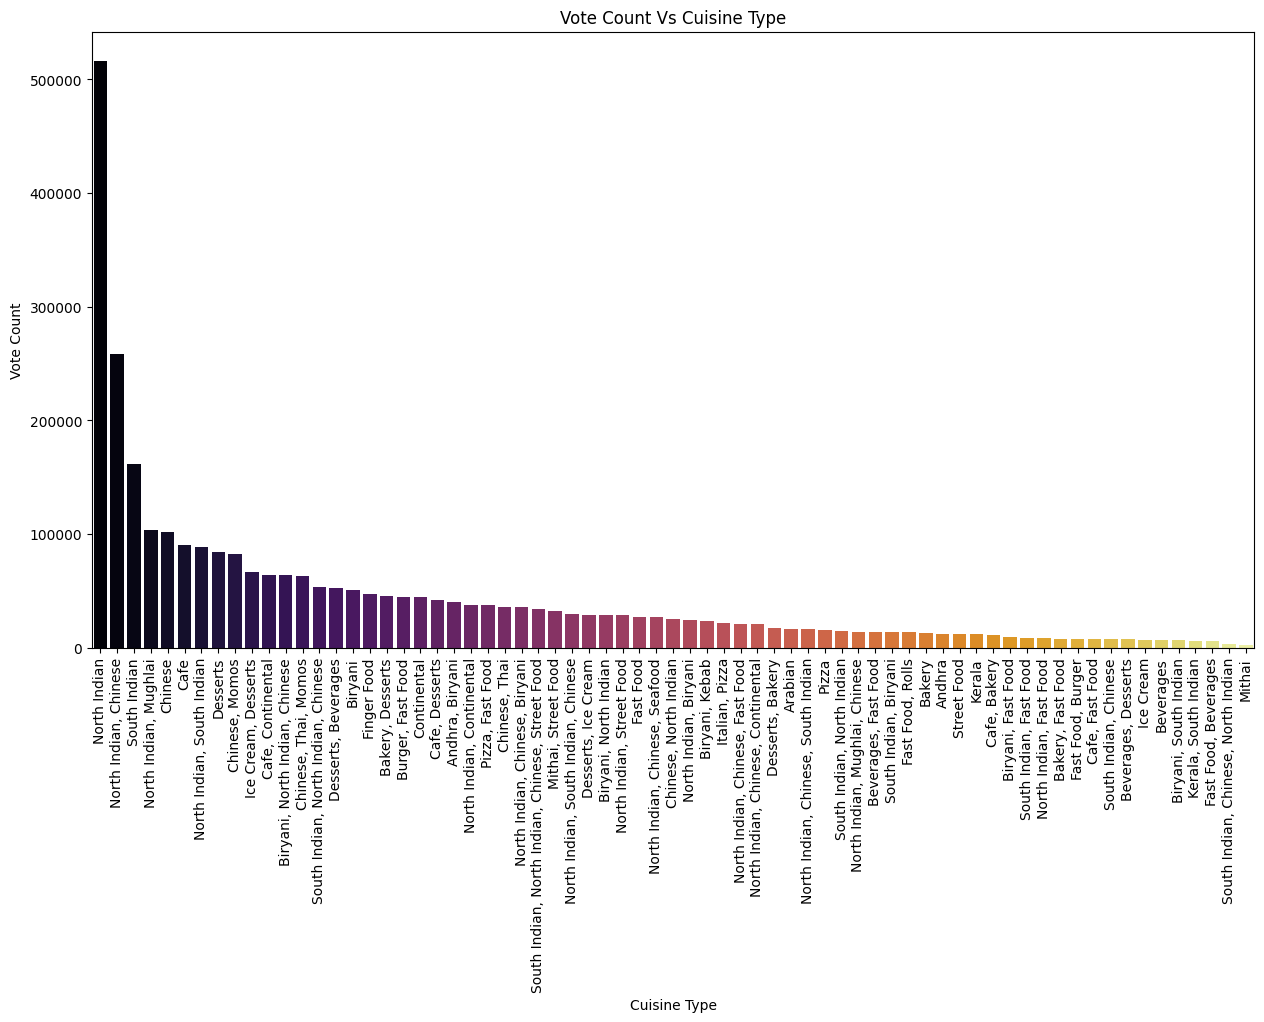

In [119]:
plt.figure(figsize = (15,8))
sns.barplot(data = df5, x = 'cuisines', y = 'votes', hue = 'cuisines', palette='inferno')
plt.xlabel("Cuisine Type")
plt.ylabel("Vote Count")
plt.title("Vote Count Vs Cuisine Type")
plt.xticks(rotation = 90)